# K Means Clustering

* K-means clustering is one of the most widely used unsupervised machine learning algorithms that forms clusters of data based on the similarity between data instances
* For K Means the number of clusters has to be defined beforehand
* K refers to the number of clusters 


 The K-means algorithm starts by randomly choosing a centroid value for each cluster


 After that the algorithm iteratively performs three steps: 
    * Find the Euclidean distance between each data instance and centroids of all the clusters
    * Assign the data instances to the cluster of the centroid with nearest distance
    * Calculate new centroid values based on the mean values of the coordinates of all the data instances from the  corresponding cluster

# K means of made up data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#create a dataset with two features ( 2 dimensional)
data = np.array([[5,3],  
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])

Text(0,0.5,'X2')

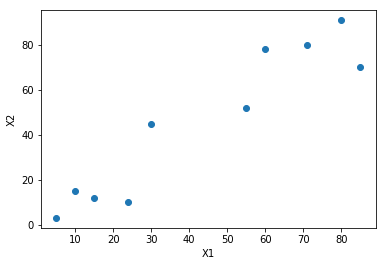

In [3]:
#visualizae the data
plt.scatter(data[:,0],data[:,1])
plt.xlabel("X1")
plt.ylabel('X2')

## 2 Clusters 

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans=KMeans(n_clusters=2).fit(data)

In [6]:
#view cluster centroids 
print(kmeans.cluster_centers_)

[[ 16.8  17. ]
 [ 70.2  74.2]]


In [7]:
# view the labels
print(kmeans.labels_)

[0 0 0 0 0 1 1 1 1 1]


In [33]:
# add the label to original data
label_data = np.insert(data, 2, values=kmeans.labels_, axis=1)

In [34]:
#view the clusters for each data point
label_data

array([[ 5,  3,  0],
       [10, 15,  0],
       [15, 12,  0],
       [24, 10,  0],
       [30, 45,  0],
       [85, 70,  1],
       [71, 80,  1],
       [60, 78,  1],
       [55, 52,  1],
       [80, 91,  1]])

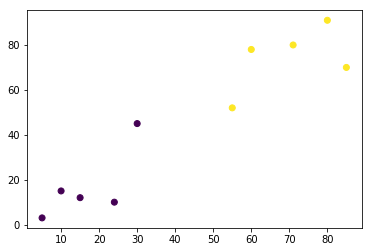

In [8]:
#visualize the clusters  with labels
plt.scatter(data[:,0],data[:,1], c=kmeans.labels_)  
plt.show()

## K =3 

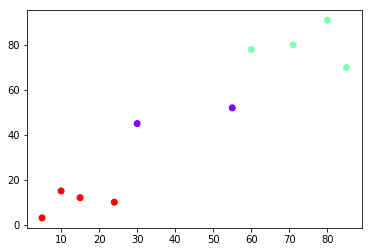

In [9]:
#create 3 clusters 
kmeans_3=KMeans(n_clusters=3).fit(data)

#visualize the clusters  with labels
plt.scatter(data[:,0],data[:,1], c=kmeans_3.labels_, cmap='rainbow')  
plt.show()

 ## K = 4 

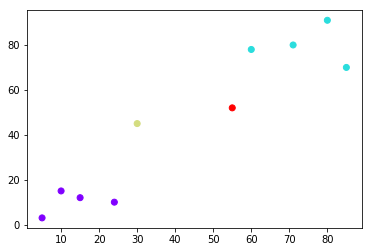

In [10]:
#create 4 clusters 
kmeans_4=KMeans(n_clusters=4).fit(data)

#visualize the clusters  with labels
plt.scatter(data[:,0],data[:,1], c=kmeans_4.labels_, cmap='rainbow')  
plt.show()

## Lets use bigger dataset 

In [11]:
df=pd.read_csv('clustering_dataset.csv')

In [12]:
df.shape

(3000, 2)

In [13]:
df.head()

,var1,var2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
var1    3000 non-null float64
var2    3000 non-null float64
dtypes: float64(2)
memory usage: 47.0 KB


In [14]:
#converting pandas columns into numpy array
f1 = df['var1'].values
f2 = df['var2'].values
X = np.array(list(zip(f1, f2)))

In [15]:
def clustering(k):
    print("Before clustering")
    
    plt.scatter(X[:,0],X[:,1],label='True Position', cmap='rainbow')  
    plt.show()
    
    
    kmeans=KMeans(n_clusters=k).fit(X)
    #visualize the clusters  with labels
    print( "After Clustering ")
    plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  
    plt.show()
    
    

Before clustering


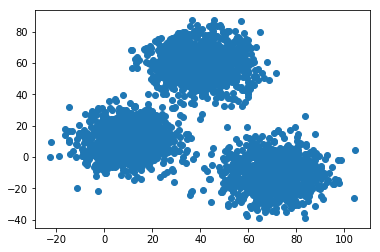

After Clustering 


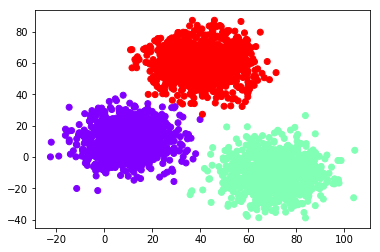

In [28]:
clustering(3)

## Selecting the K value

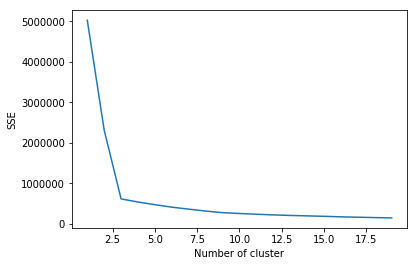

In [47]:
#create empty vector to compare sum of squred error values
sse = {}
# run the clustering excercise for range of  K values
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(X)
    df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Using elbow method it is clearly evident that we should be using K=3 value in order to have best clusters 